# Loan Default Prediction - Part 03 - Logistic Regression with Regularization and Feature Expansion

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 03 of the project: Logistic Regression with Regularization and Feature Expansion.

I will first load the normalized data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import project_utils as utils

In [2]:
# Load the training data (imputed and normalized) from the CSV file

df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


In [3]:
# Separate training and validation sets

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

## L2 Regularization

In the very last experiment, we can see that there is a difference in the metrics measured from the training set and the validation set, indicating there could be overfitting. I will next try to tune the regularization parameter, __C__ in __sklearn.linear_model.LogisticRegression__, to see if I can reduce the discrepancy. __C__ is the inverse of regularization strength. The smaller __C__ is, the stronger the regularization. The default value of __C__ is 1. The default regularization type is L2.

In [4]:
# Define a set of Cs to try

Cs = [10., 1., 0.1, 0.01, 1e-3, 1e-4]

----- C = 10.000000 -----
Time elapsed (Training): 1382.7401 s
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906028
ROCAUC Score (Training): 0.753259
PRAUC Score (Training): 0.139515
Accuracy (Validation): 0.910832
ROCAUC Score (Validation): 0.712529
PRAUC Score (Validation): 0.094472
Time elapsed (Evaluation): 0.9567 s


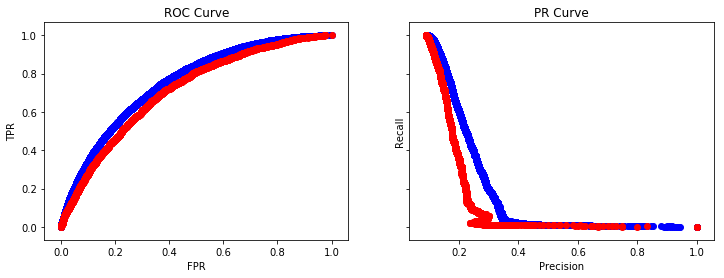

----- C = 1.000000 -----
Time elapsed (Training): 316.7951 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906040
ROCAUC Score (Training): 0.746871
PRAUC Score (Training): 0.132637
Accuracy (Validation): 0.911116
ROCAUC Score (Validation): 0.709011
PRAUC Score (Validation): 0.090800
Time elapsed (Evaluation): 0.8397 s


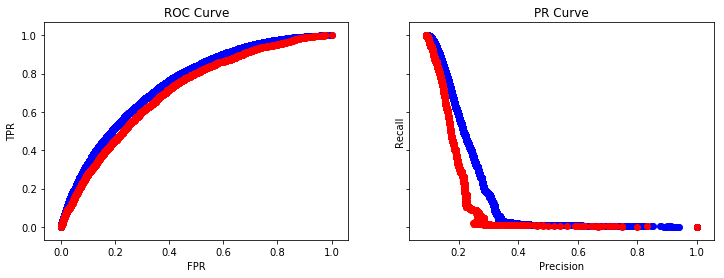

----- C = 0.100000 -----
Time elapsed (Training): 104.4807 s
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906206
ROCAUC Score (Training): 0.743458
PRAUC Score (Training): 0.128672
Accuracy (Validation): 0.911401
ROCAUC Score (Validation): 0.711006
PRAUC Score (Validation): 0.092164
Time elapsed (Evaluation): 0.8627 s


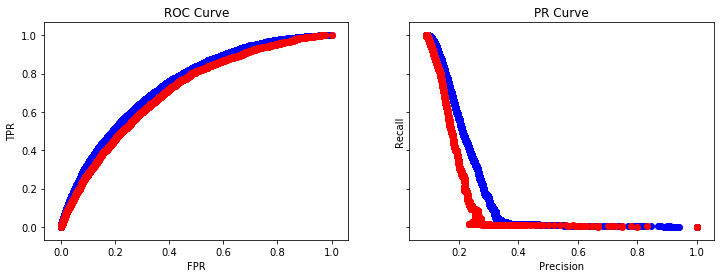

----- C = 0.010000 -----
Time elapsed (Training): 42.7454 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.736909
PRAUC Score (Training): 0.120929
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.712660
PRAUC Score (Validation): 0.091904
Time elapsed (Evaluation): 0.8787 s


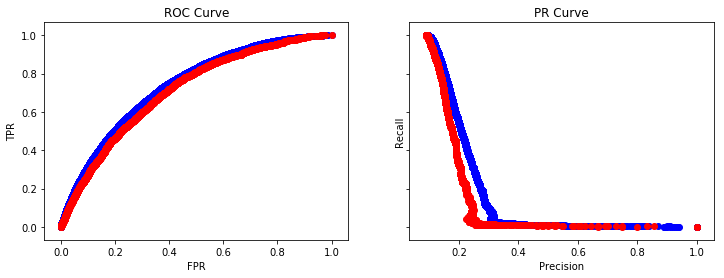

----- C = 0.001000 -----
Time elapsed (Training): 22.8197 s
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906419
ROCAUC Score (Training): 0.721592
PRAUC Score (Training): 0.109033
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.703759
PRAUC Score (Validation): 0.084696
Time elapsed (Evaluation): 0.9007 s


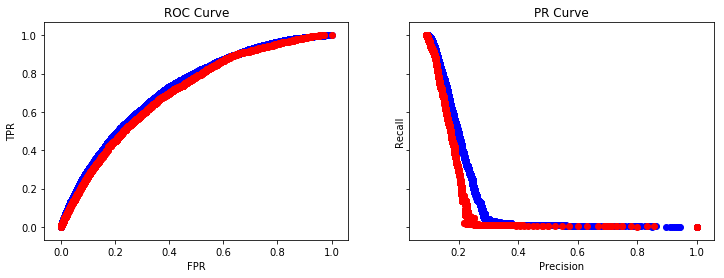

----- C = 0.000100 -----
Time elapsed (Training): 13.8106 s
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.906241
ROCAUC Score (Training): 0.692539
PRAUC Score (Training): 0.086922
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.677472
PRAUC Score (Validation): 0.067781
Time elapsed (Evaluation): 0.8197 s


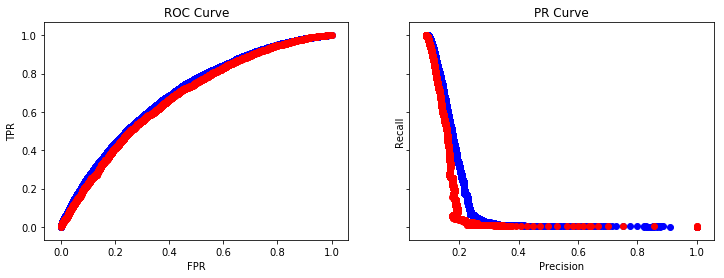

In [5]:
from sklearn import linear_model
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for C in Cs:
    print('----- C = %f -----' % C)
    clf = linear_model.LogisticRegression(C=C)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

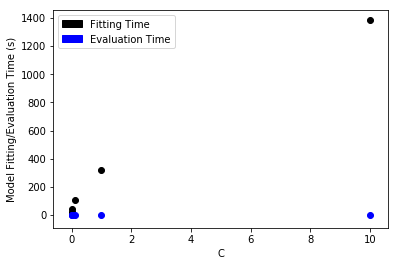

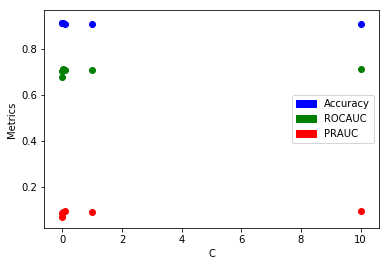

       0_C  1_Accuracy  2_ROCAUC   3_PRAUC   4_fit_time  5_eval_time
0  10.0000    0.910832  0.712529  0.094472  1382.740104     0.956681
1   1.0000    0.911116  0.709011  0.090800   316.795090     0.839716
2   0.1000    0.911401  0.711006  0.092164   104.480731     0.862708
3   0.0100    0.911780  0.712660  0.091904    42.745382     0.878720
4   0.0010    0.912064  0.703759  0.084696    22.819716     0.900711
5   0.0001    0.912017  0.677472  0.067781    13.810598     0.819724


             0_C  1_Accuracy  2_ROCAUC   3_PRAUC   4_fit_time  5_eval_time
count   6.000000    6.000000  6.000000  6.000000     6.000000     6.000000
mean    1.851850    0.911535  0.704406  0.086969   313.898603     0.876377
std     4.010836    0.000502  0.013599  0.009957   535.647307     0.048553
min     0.000100    0.910832  0.677472  0.067781    13.810598     0.819724
25%     0.003250    0.911187  0.705072  0.086222    27.801132     0.845464
50%     0.055000    0.911590  0.710009  0.091352    73.613056    

In [6]:
utils.plot_metrics (Cs, 'C', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

We can see that as the strength of regularization increases, the curves of the training and the validation sets get closer. However, the ROCAUC got worse. For example, when __C__ = 0.0001, the ROCAUCs of both the training and the validation sets decrease to < 0.7. This illustrates the __bias-variance trade-off__ -- applying more regularization makes the model less customized towards the training set, but the model cannot achieve its full potential.

I will next try another set of more fine-grained __C__s to find its optimal value.

In [7]:
# Define a set of Cs to try

Cs = [1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4]

----- C = 0.100000 -----
Time elapsed (Training): 103.5500 s
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906206
ROCAUC Score (Training): 0.743458
PRAUC Score (Training): 0.128672
Accuracy (Validation): 0.911401
ROCAUC Score (Validation): 0.711006
PRAUC Score (Validation): 0.092164
Time elapsed (Evaluation): 0.8047 s


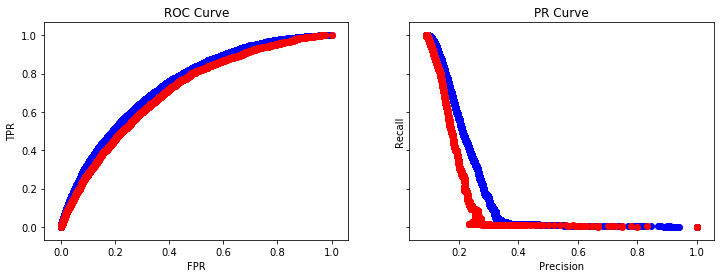

----- C = 0.050000 -----
Time elapsed (Training): 75.5759 s
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906229
ROCAUC Score (Training): 0.742019
PRAUC Score (Training): 0.126937
Accuracy (Validation): 0.911543
ROCAUC Score (Validation): 0.711759
PRAUC Score (Validation): 0.092377
Time elapsed (Evaluation): 0.8337 s


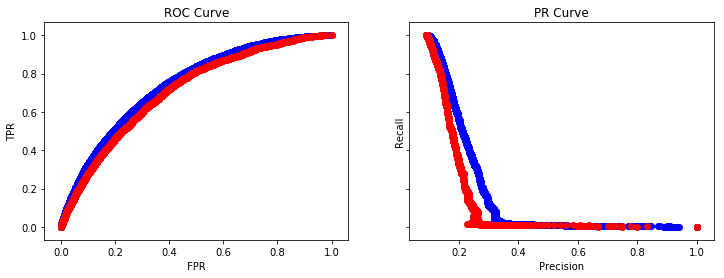

----- C = 0.020000 -----
Time elapsed (Training): 65.9120 s
LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906265
ROCAUC Score (Training): 0.739488
PRAUC Score (Training): 0.123908
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.712564
PRAUC Score (Validation): 0.092534
Time elapsed (Evaluation): 0.8967 s


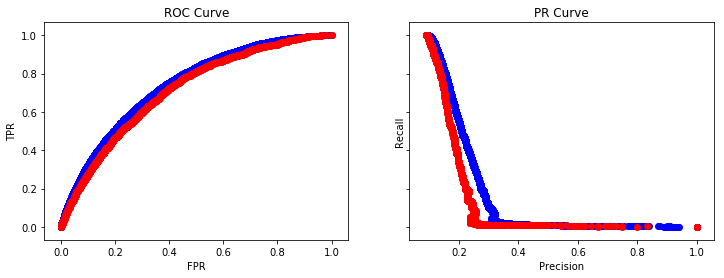

----- C = 0.010000 -----
Time elapsed (Training): 46.6151 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.736909
PRAUC Score (Training): 0.120929
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.712660
PRAUC Score (Validation): 0.091904
Time elapsed (Evaluation): 0.8107 s


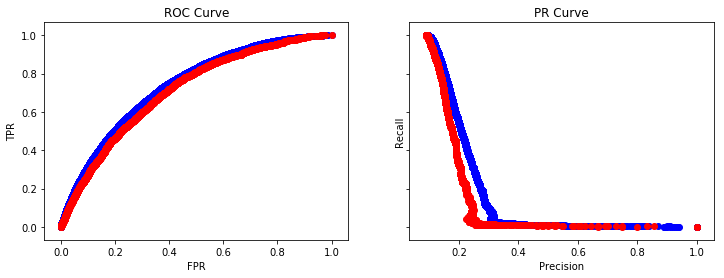

----- C = 0.005000 -----
Time elapsed (Training): 37.9879 s
LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906395
ROCAUC Score (Training): 0.733561
PRAUC Score (Training): 0.118088
Accuracy (Validation): 0.911875
ROCAUC Score (Validation): 0.711816
PRAUC Score (Validation): 0.090655
Time elapsed (Evaluation): 0.9237 s


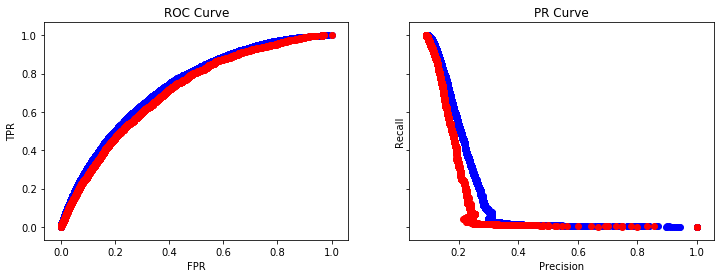

----- C = 0.002000 -----
Time elapsed (Training): 29.3416 s
LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906383
ROCAUC Score (Training): 0.727608
PRAUC Score (Training): 0.113573
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.708403
PRAUC Score (Validation): 0.087714
Time elapsed (Evaluation): 0.8327 s


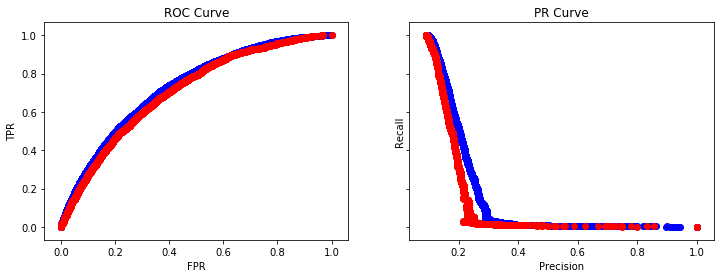

----- C = 0.001000 -----
Time elapsed (Training): 25.5759 s
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906419
ROCAUC Score (Training): 0.721592
PRAUC Score (Training): 0.109033
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.703759
PRAUC Score (Validation): 0.084696
Time elapsed (Evaluation): 0.8457 s


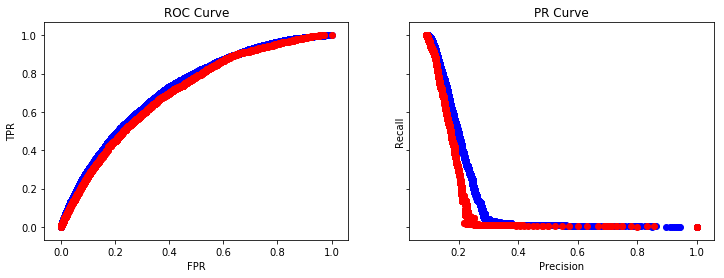

----- C = 0.000500 -----
Time elapsed (Training): 18.3472 s
LogisticRegression(C=0.0005, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.906360
ROCAUC Score (Training): 0.714056
PRAUC Score (Training): 0.103261
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.697238
PRAUC Score (Validation): 0.079917
Time elapsed (Evaluation): 0.8637 s


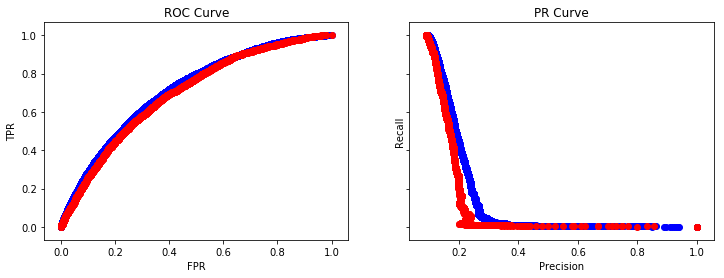

----- C = 0.000200 -----
Time elapsed (Training): 15.7730 s
LogisticRegression(C=0.0002, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.906300
ROCAUC Score (Training): 0.702186
PRAUC Score (Training): 0.094165
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.686415
PRAUC Score (Validation): 0.072496
Time elapsed (Evaluation): 0.8057 s


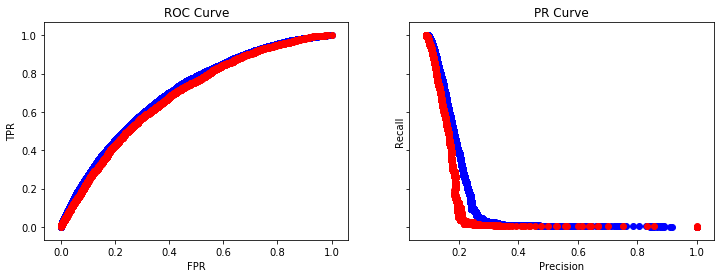

----- C = 0.000100 -----
Time elapsed (Training): 14.2475 s
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.906241
ROCAUC Score (Training): 0.692539
PRAUC Score (Training): 0.086922
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.677472
PRAUC Score (Validation): 0.067781
Time elapsed (Evaluation): 0.8577 s


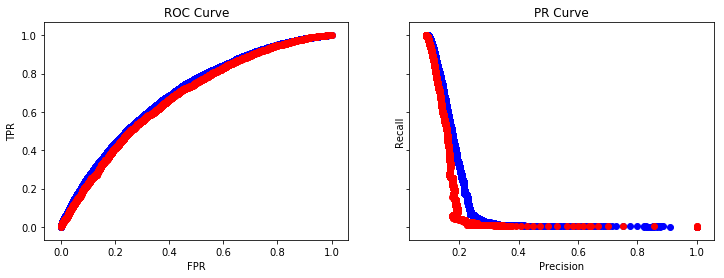

In [8]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for C in Cs:
    print('----- C = %f -----' % C)
    clf = linear_model.LogisticRegression(C=C)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

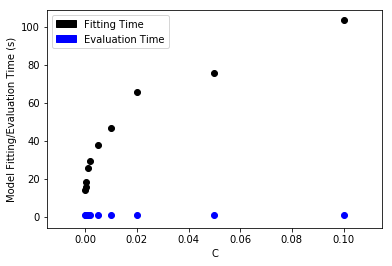

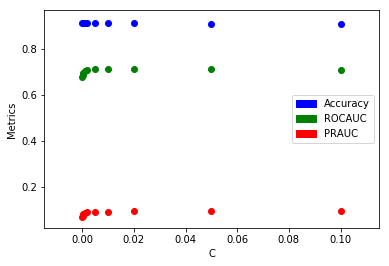

      0_C  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  0.1000    0.911401  0.711006  0.092164  103.550026     0.804730
1  0.0500    0.911543  0.711759  0.092377   75.575909     0.833734
2  0.0200    0.911780  0.712564  0.092534   65.912004     0.896694
3  0.0100    0.911780  0.712660  0.091904   46.615149     0.810724
4  0.0050    0.911875  0.711816  0.090655   37.987884     0.923705
5  0.0020    0.912064  0.708403  0.087714   29.341637     0.832734
6  0.0010    0.912064  0.703759  0.084696   25.575852     0.845715
7  0.0005    0.912017  0.697238  0.079917   18.347155     0.863709
8  0.0002    0.912017  0.686415  0.072496   15.772969     0.805744
9  0.0001    0.912017  0.677472  0.067781   14.247460     0.857709


             0_C  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  10.000000   10.000000  10.000000  10.000000   10.000000    10.000000
mean    0.018880    0.911856   0.703309   0.085224   43.292604     0.847520
std     0.032431    0.000231   0.

In [9]:
utils.plot_metrics (Cs, 'C', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

We can see that each metric performs the best at a different __C__s. Because this is a classification problem with unbalanced classes, accuracy isn't the best metric to evaluate the model. I choose to optimize for ROCAUC and settle for __C__=0.01.

## L1 Regularization

Next, I will try L1 regularization instead of L2. L1 regularization has an effect similar to feature selection.

In [10]:
# Define a set of Cs to try

Cs = [10., 1., 0.1, 0.01, 1e-3, 1e-4]

----- C = 10.000000 -----
Time elapsed (Training): 12643.2968 s
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906040
ROCAUC Score (Training): 0.753011
PRAUC Score (Training): 0.139049
Accuracy (Validation): 0.910879
ROCAUC Score (Validation): 0.712572
PRAUC Score (Validation): 0.093866
Time elapsed (Evaluation): 1.7554 s


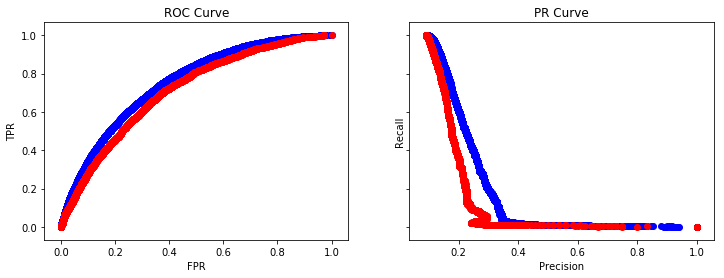

----- C = 1.000000 -----
Time elapsed (Training): 2442.5184 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906217
ROCAUC Score (Training): 0.745351
PRAUC Score (Training): 0.130312
Accuracy (Validation): 0.911211
ROCAUC Score (Validation): 0.712100
PRAUC Score (Validation): 0.092316
Time elapsed (Evaluation): 0.8717 s


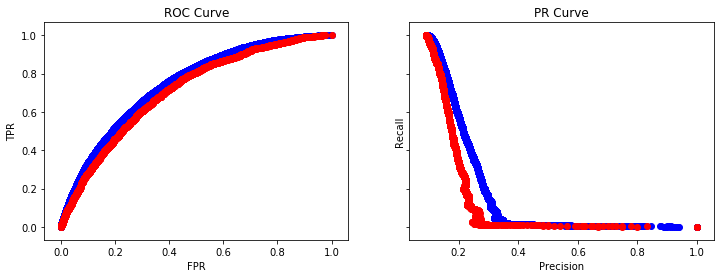

----- C = 0.100000 -----
Time elapsed (Training): 151.8196 s
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906217
ROCAUC Score (Training): 0.735128
PRAUC Score (Training): 0.118811
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.715223
PRAUC Score (Validation): 0.092492
Time elapsed (Evaluation): 0.9767 s


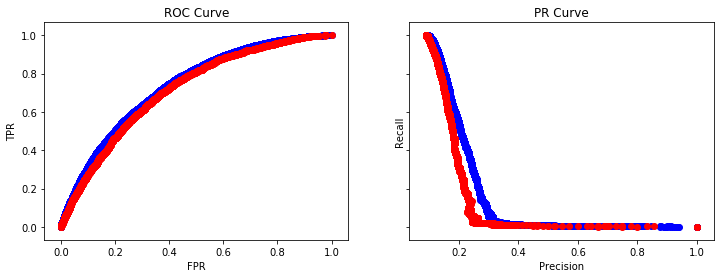

----- C = 0.010000 -----
Time elapsed (Training): 14.7243 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906383
ROCAUC Score (Training): 0.715243
PRAUC Score (Training): 0.101354
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.705117
PRAUC Score (Validation): 0.088988
Time elapsed (Evaluation): 0.8677 s


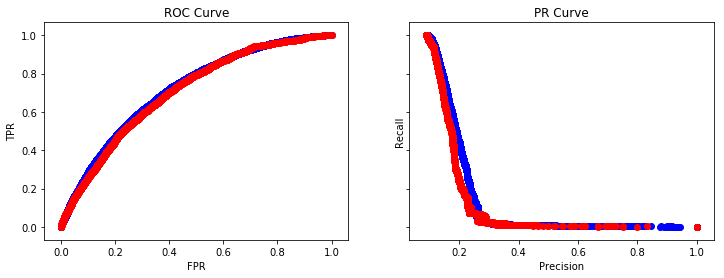

----- C = 0.001000 -----
Time elapsed (Training): 6.1930 s
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906111
ROCAUC Score (Training): 0.677481
PRAUC Score (Training): 0.068257
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.680123
PRAUC Score (Validation): 0.066918
Time elapsed (Evaluation): 0.9387 s


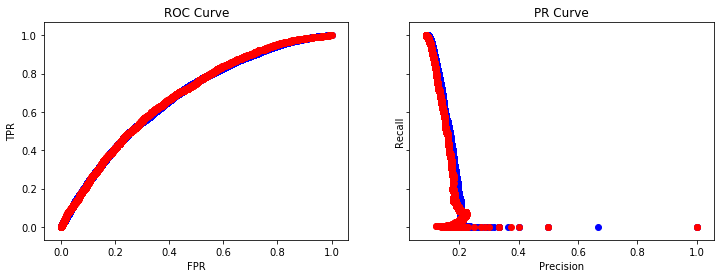

----- C = 0.000100 -----
Time elapsed (Training): 4.7935 s
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.500000
PRAUC Score (Training): 0.453049
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.500000
PRAUC Score (Validation): 0.455914
Time elapsed (Evaluation): 0.6338 s


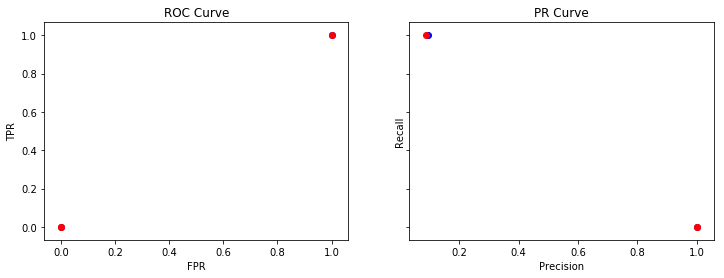

In [11]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []
for C in Cs:
    print('----- C = %f -----' % C)
    clf = linear_model.LogisticRegression(C=C, penalty='l1')
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

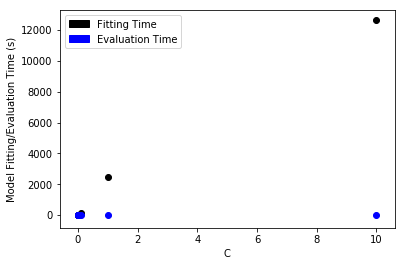

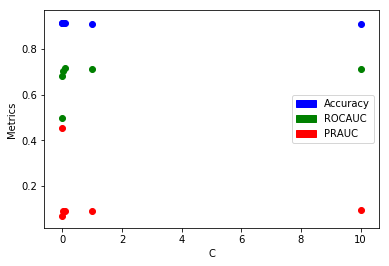

       0_C  1_Accuracy  2_ROCAUC   3_PRAUC    4_fit_time  5_eval_time
0  10.0000    0.910879  0.712572  0.093866  12643.296782     1.755440
1   1.0000    0.911211  0.712100  0.092316   2442.518419     0.871709
2   0.1000    0.911780  0.715223  0.092492    151.819622     0.976689
3   0.0100    0.912064  0.705117  0.088988     14.724309     0.867723
4   0.0010    0.911827  0.680123  0.066918      6.193011     0.938700
5   0.0001    0.911827  0.500000  0.455914      4.793461     0.633798


             0_C  1_Accuracy  2_ROCAUC   3_PRAUC    4_fit_time  5_eval_time
count   6.000000    6.000000  6.000000  6.000000      6.000000     6.000000
mean    1.851850    0.911598  0.670856  0.148416   2543.890934     1.007343
std     4.010836    0.000452  0.084689  0.150983   5040.116875     0.385416
min     0.000100    0.910879  0.500000  0.066918      4.793461     0.633798
25%     0.003250    0.911353  0.686371  0.089820      8.325835     0.868719
50%     0.055000    0.911804  0.708608  0.092404    

In [12]:
utils.plot_metrics (Cs, 'C', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

## Feature Expansion: Polynomial Features

Logistic regression is a linear model. It does not do well when the relationship between the data and the label is nonlinear. Next, I will try using the expanded polynomial features prepared in Part 01 to see if they improve the model performance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 3199 entries, f3_1 to loss
dtypes: float64(3199)
memory usage: 2.5 GB
Time elapsed (Training): 333.7471 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906360
ROCAUC Score (Training): 0.689698
PRAUC Score (Training): 0.086213
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.674265
PRAUC Score (Validation): 0.066868
Time elapsed (Evaluation): 1.4365 s


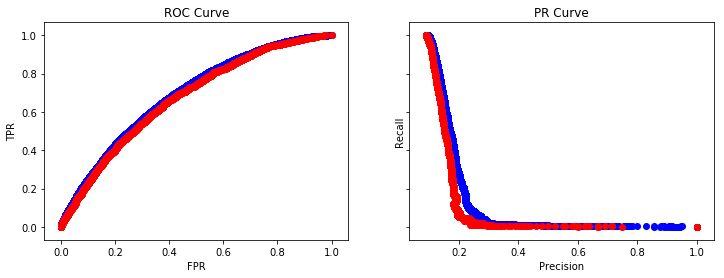

In [13]:
# Train the model with normalized and expanded to have degree-2 polynomial features

df, X, y = utils.load_csv('train_v2_preprocessed_normalized_poly2.csv')
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)
clf = linear_model.LogisticRegression()
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Time elapsed (Training): 465.8866 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906383
ROCAUC Score (Training): 0.700705
PRAUC Score (Training): 0.095361
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.682137
PRAUC Score (Validation): 0.070211
Time elapsed (Evaluation): 1.4445 s


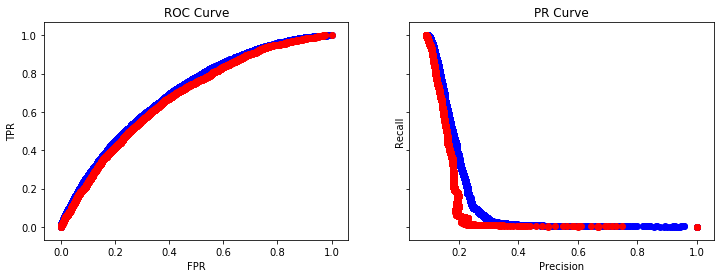

In [14]:
# Train the model with optimized regularization

clf = linear_model.LogisticRegression(C=0.01)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Time elapsed (Training): 543.5613 s
LogisticRegression(C=0.01, class_weight={0: 1.0, 1: 10.0}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.617320
ROCAUC Score (Training): 0.721386
PRAUC Score (Training): 0.105879
Accuracy (Validation): 0.619388
ROCAUC Score (Validation): 0.695358
PRAUC Score (Validation): 0.081197
Time elapsed (Evaluation): 1.6645 s


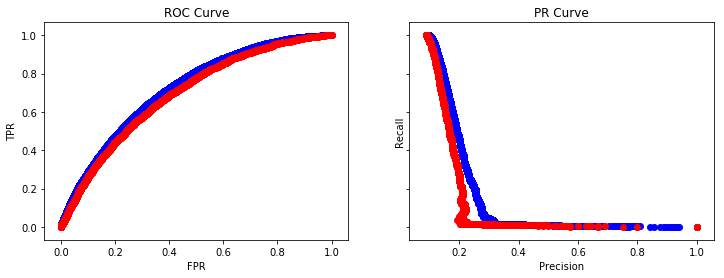

In [15]:
# Train the model with optimized regularization and class weights

class_weight = {0: 1., 1: 10.}
clf = linear_model.LogisticRegression(class_weight=class_weight, C=0.01)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 3904 entries, f3_1 to loss
dtypes: float64(3904)
memory usage: 3.1 GB
Time elapsed (Training): 760.1473 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906265
ROCAUC Score (Training): 0.558528
PRAUC Score (Training): 0.024507
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.546624
PRAUC Score (Validation): 0.057905
Time elapsed (Evaluation): 1.9784 s


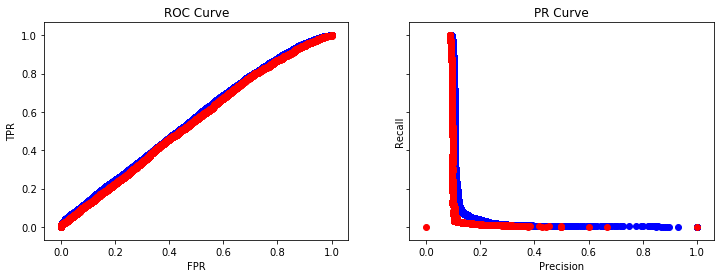

In [16]:
# Train the model with normalized and expanded to have degree-3 polynomial features

df, X, y = utils.load_csv('train_v2_preprocessed_normalized_poly3.csv')
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)
clf = linear_model.LogisticRegression()
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Time elapsed (Training): 973.1630 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.904783
ROCAUC Score (Training): 0.612682
PRAUC Score (Training): 0.043598
Accuracy (Validation): 0.911401
ROCAUC Score (Validation): 0.600144
PRAUC Score (Validation): 0.032332
Time elapsed (Evaluation): 2.0483 s


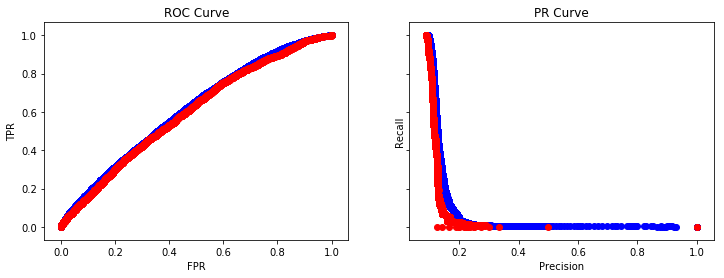

In [17]:
# Train the model with optimized regularization

clf = linear_model.LogisticRegression(C=0.01)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Time elapsed (Training): 302.8965 s
LogisticRegression(C=0.01, class_weight={0: 1.0, 1: 10.0}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy (Training): 0.513440
ROCAUC Score (Training): 0.622294
PRAUC Score (Training): 0.045247
Accuracy (Validation): 0.516141
ROCAUC Score (Validation): 0.604405
PRAUC Score (Validation): 0.033253
Time elapsed (Evaluation): 2.0413 s


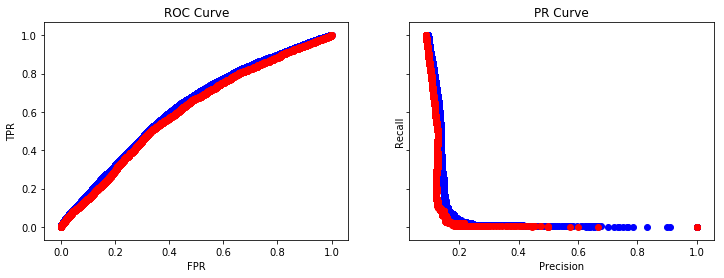

In [18]:
# Train the model with optimized regularization and class weights

class_weight = {0: 1., 1: 10.}
clf = linear_model.LogisticRegression(class_weight=class_weight, C=0.01)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

First of all, the models take a long time to train because of the expanded features. Although the training data now contains more information than before, but, perhaps there is too much information, the models with or without regularization, with or without class weights, do not outperform those trained from the original, normalized features. The best ROCAUCs I got are 0.695 and 0.604, for polynomial degree 2 and polynomial degree 3, respectively, compared to 0.713 from the original features.